In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cleanliness_presence     879
cleanliness_positive     504
cleanliness_negative     383
comfort_presence        2365
comfort_positive         978
comfort_negative        1433
amenities_presence      1812
amenities_positive       948
amenities_negative       920
staff_presence          1203
staff_positive           937
staff_negative           283
value_presence           419
value_positive           169
value_negative           251
wifi_presence            128
wifi_positive             43
wifi_negative             86
location_presence       1318
location_positive       1184
location_negative        163
other_presence           784
other_positive           348
other_negative           451
dtype: int64


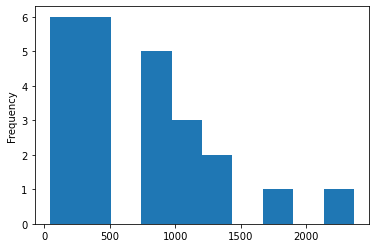

In [3]:
df = pd.read_csv("data/shuffled_data.csv")
onesInFullDf = (df[df.columns[1:-1]] == 1).astype(int).sum(axis=0)
print(onesInFullDf)
onesInFullDf.plot.hist()
plt.show()

# All rows have at least a 1 output!

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(df[df.columns[-1]], df[df.columns[1:-1]], test_size=0.2, shuffle = False)

In [5]:
onesInTr = (y_train == 1).astype(int).sum(axis=0)
onesRatio = onesInTr/onesInFullDf
print(onesRatio)

#Seems a balanced sample of the full dataset!

cleanliness_presence    0.805461
cleanliness_positive    0.825397
cleanliness_negative    0.778068
comfort_presence        0.802537
comfort_positive        0.802658
comfort_negative        0.803908
amenities_presence      0.790287
amenities_positive      0.796414
amenities_negative      0.785870
staff_presence          0.815461
staff_positive          0.816435
staff_negative          0.816254
value_presence          0.811456
value_positive          0.781065
value_negative          0.832669
wifi_presence           0.789062
wifi_positive           0.813953
wifi_negative           0.779070
location_presence       0.803490
location_positive       0.805743
location_negative       0.797546
other_presence          0.784439
other_positive          0.761494
other_negative          0.802661
dtype: float64


In [6]:
import numpy as np
from embedding import embedding

trainSentencesMatrix = embedding(X_train)
valSentencesMatrix = embedding(X_val)


In [7]:
np.save('data/x_train.npy', trainSentencesMatrix, allow_pickle=True, fix_imports=True)
np.save('data/x_val.npy', valSentencesMatrix, allow_pickle=True, fix_imports=True)
np.save('data/y_train.npy', y_train, allow_pickle=True, fix_imports=True)
np.save('data/y_val.npy', y_val, allow_pickle=True, fix_imports=True)

/Users/michelebersani/opt/anaconda3/envs/gensim/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
